<a href="https://colab.research.google.com/github/LeonardoMafra/Python_Data_Science/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# introdução ao web scraping

In [4]:
# Libraries

import requests

from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
# URL para realizar o Web Scraping ( raspagem de dados)

url = 'https://books.toscrape.com/index.html'

In [5]:
# fazer a requesição HTTP


response = requests.get(url)

In [6]:
# usar biblioteca BeautifulSoup para parsear( pegar os dados e transformar para utilizar em python) o conteudo


soup = bs(response.text,'html.parser')

In [7]:
# seleciona todas as tags da pagina web e tras pro python
soup.select('article.product_pod')

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [ ]:
# lista para retornar a quantidade de livros na pagina web

livros = len(soup.select('article.product_pod'))
print(f'Existem {livros} livros na pagina web.')

Existem 20 livros na pagina web.


In [ ]:
# codigo para pegar as tags do primeiro livro

soup.select('article.product_pod')[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [8]:
# pegar o titulo do primeiro livro

titulo = soup.select('article.product_pod')[0].h3.a['title']
print(f'O titulo do primeiro livro é : {titulo}.')

O titulo do primeiro livro é : A Light in the Attic.


In [9]:
# selecionando o preco do livro
preco = soup.select('article.product_pod')[0].select_one('p.price_color').text
print(f'O preço do livro é : {preco}')

O preço do livro é : Â£51.77


In [10]:
# pegando se o livro esta em estoque

estoque = soup.select('article.product_pod')[0].select_one('p.instock.availability').text.strip()
print(f'Status do livro no estoque: {estoque}')

Status do livro no estoque: In stock


In [11]:
# codigo desafio pegar as estrelas do livros

star = soup.select('article.product_pod')[0].select_one('p.star-rating')

estrela = star.get('class')[1]

def traduzir_numero(numero_em_ingles):
  traducao = {
      'one': 'um',
      'two': 'dois',
      'three': 'tres',
      'four': 'quatro',
      'five': 'cinco'
  }
  return traducao.get(numero_em_ingles.lower(), 'Numero não encontrado')


print(f'As recomendações do livro foram de: {traduzir_numero(estrela)} estrelas')

As recomendações do livro foram de: tres estrelas


In [ ]:
# fazer requisicao htpp
response = requests.get(url)


In [12]:
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []



for book in soup.select('article.product_pod'):
  ls_titulo.append(book.h3.a['title'])
  ls_preco.append(book.select_one('p.price_color').text)
  ls_estoque.append(book.select_one('p.instock.availability').text.strip())

  #pegar estrela

  star = book.select_one('p.star-rating')
  ls_nota.append(traduzir_numero(star.get('class')[1].lower()))


pagina = pd.DataFrame({
    'Titulo': ls_titulo,
    'Preço' : ls_preco,
    'Estoque': ls_estoque,
    'Nota': ls_nota
    })


In [16]:
pagina.shape

(20, 4)

In [17]:
pagina.to_excel('book.xlsx')

In [28]:
url_base = 'https://books.toscrape.com/catalogue/'

# listas para armazenar os dados
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []

# loop para percorrer as paginas

pagina_atual = 1

while True:
  url = f'{url_base}page-{pagina_atual}.html'
  response = requests.get(url)

#verifica  se a pagina existe

  if response.status_code !=200:
    print(f'Fim das paginas na pagina {pagina_atual}.')
    break

# raspagem dos dados

  soup = bs(response.text,'html.parser')
  for book in soup.select('article.product_pod'):
    ls_titulo.append(book.h3.a['title'])
    ls_preco.append(book.select_one('p.price_color').text)
    ls_estoque.append(book.select_one('p.instock.availability').text.strip())

    #pegar estrela

    star = book.select_one('p.star-rating')
    ls_nota.append(traduzir_numero(star.get('class')[1].lower()))


  print(f'pagina {pagina_atual} raspada')
  pagina_atual +=1


pagina = pd.DataFrame({
    'Titulo': ls_titulo,
    'Preço' : ls_preco,
    'Estoque': ls_estoque,
    'Nota': ls_nota
    })


pagina 1 raspada
pagina 2 raspada
pagina 3 raspada
pagina 4 raspada
pagina 5 raspada
pagina 6 raspada
pagina 7 raspada
pagina 8 raspada
pagina 9 raspada
pagina 10 raspada
pagina 11 raspada
pagina 12 raspada
pagina 13 raspada
pagina 14 raspada
pagina 15 raspada
pagina 16 raspada
pagina 17 raspada
pagina 18 raspada
pagina 19 raspada
pagina 20 raspada
pagina 21 raspada
pagina 22 raspada
pagina 23 raspada
pagina 24 raspada
pagina 25 raspada
pagina 26 raspada
pagina 27 raspada
pagina 28 raspada
pagina 29 raspada
pagina 30 raspada
pagina 31 raspada
pagina 32 raspada
pagina 33 raspada
pagina 34 raspada
pagina 35 raspada
pagina 36 raspada
pagina 37 raspada
pagina 38 raspada
pagina 39 raspada
pagina 40 raspada
pagina 41 raspada
pagina 42 raspada
pagina 43 raspada
pagina 44 raspada
pagina 45 raspada
pagina 46 raspada
pagina 47 raspada
pagina 48 raspada
pagina 49 raspada
pagina 50 raspada
Fim das paginas na pagina 51.


In [31]:
pagina.to_excel('book_final.xlsx')

In [24]:
pagina.shape

(1000, 4)

In [29]:
pagina.head()

,Titulo,Preço,Estoque,Nota
0,A Light in the Attic,Â£51.77,In stock,tres
1,Tipping the Velvet,Â£53.74,In stock,um
2,Soumission,Â£50.10,In stock,um
3,Sharp Objects,Â£47.82,In stock,quatro
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,cinco


In [48]:
#analise de dados sobre os dados dos livros criados


df = pd.read_excel('/content/book_final.xlsx')

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
livros = df.copy()

In [61]:
livros.head()

,Unnamed: 0,Titulo,Preço,Estoque,Nota
0,0,A Light in the Attic,Â£51.77,In stock,tres
1,1,Tipping the Velvet,Â£53.74,In stock,um
2,2,Soumission,Â£50.10,In stock,um
3,3,Sharp Objects,Â£47.82,In stock,quatro
4,4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,cinco


In [62]:
livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Titulo      1000 non-null   object
 2   Preço       1000 non-null   object
 3   Estoque     1000 non-null   object
 4   Nota        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [63]:
# limpeza dos dados

# 1 converter a coluna preço de string para float

livros['Preço'] = livros['Preço'].replace('[£]','',regex = True).replace('[Â]', '', regex = True).astype(float)

# converter coluna nota de texto para valores numericos

nota_mapa = {'um': 1,'dois': 2, 'tres' : 3, 'quatro' : 4, 'cinco' : 5}
livros['Nota'] = livros['Nota'].map(nota_mapa)

In [66]:
livros.head()

,Unnamed: 0,Titulo,Preço,Estoque,Nota
0,0,A Light in the Attic,51.77,In stock,3
1,1,Tipping the Velvet,53.74,In stock,1
2,2,Soumission,50.10,In stock,1
3,3,Sharp Objects,47.82,In stock,4
4,4,Sapiens: A Brief History of Humankind,54.23,In stock,5


In [67]:
livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Titulo      1000 non-null   object 
 2   Preço       1000 non-null   float64
 3   Estoque     1000 non-null   object 
 4   Nota        1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [86]:
# hipotese para a analise
# livros com notas mais altas tem valores mais altos
# os livros estao com preco medio em torno de 50,00


media_preco = livros['Preço'].mean()
mediana_preco = livros['Preço'].median()
desvio_preco = livros['Preço'].std()


# preco medio por nota

media_preco_por_nota = livros.groupby('Nota')['Preço'].mean()

#resultado estatistico

print(f'Media dos preços: £ {media_preco:.2f} ')
print(f'Mediana dos preços: £ {mediana_preco:.2f} ')
print(f'Desvio padrão dos preços: £ {desvio_preco:.2f} ')
print(f'Media dos preços por nota: {media_preco_por_nota} ')



Media dos preços: £ 35.07 
Mediana dos preços: £ 35.98 
Desvio padrão dos preços: £ 14.45 
Media dos preços por nota: Nota
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: Preço, dtype: float64 


<ipython-input-90-8d11a472fc7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nota',y='Preço',data=livros,palette='Blues')


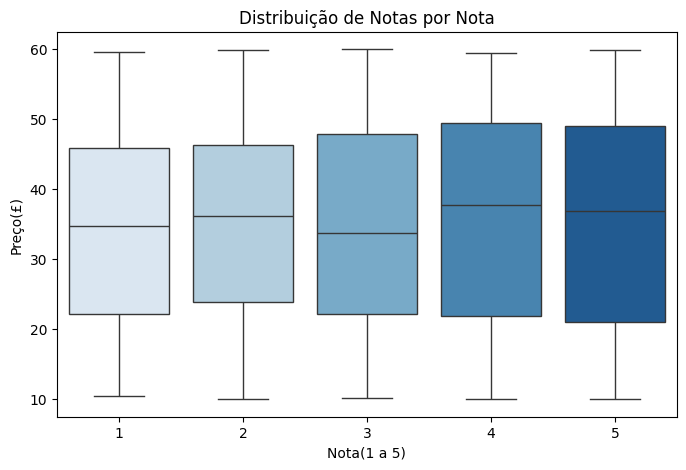

In [90]:
#criando vizualização

plt.figure(figsize=(8,5))
sns.boxplot(x='Nota',y='Preço',data=livros,palette='Blues')
plt.title('Distribuição de Notas por Nota')
plt.xlabel('Nota(1 a 5)')
plt.ylabel('Preço(£)')
plt.show()